## Review-Arrival Prediction: Does the number of online reviews predict annual tourist arrivals for top destinations?

Examines whether review volume serves as a reliable indicator of tourist traffic.

Analyzes the predictive power of online engagement metrics on actual visitor numbers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
traffic = pd.read_csv('../TouristArrival/TouristArrivals.csv')
reviews = pd.read_csv('../TouristArrival/airbnb_scraped_dataset.csv')

In [3]:
traffic.head()

,City,International Tourist Arrivals (Millions)
0,Bangkok,30.3
1,London,22.7
2,Istanbul,19.7
3,Paris,18.3
4,New York,16.4


In [4]:
traffic.shape

(14, 2)

In [5]:
reviews.head()

,City,Price_EGP,Rating,Reviews,Link
0,Barcelona,9147,New,0,https://www.airbnb.com/rooms/1540075047176453153
1,Barcelona,15981,5.0,4,https://www.airbnb.com/rooms/1011688349919294749
2,Barcelona,9589,4.92,13,https://www.airbnb.com/rooms/1544961390174146724
3,Barcelona,8683,5.0,5,https://www.airbnb.com/rooms/1491959272532158821
4,Barcelona,7484,4.74,123,https://www.airbnb.com/rooms/1148647496137216055


In [6]:
reviews.shape

(1400, 5)

In [7]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   City                                       14 non-null     object 
 1   International Tourist Arrivals (Millions)  14 non-null     float64
dtypes: float64(1), object(1)
memory usage: 356.0+ bytes


In [8]:
traffic.isna().sum()

City                                         0
International Tourist Arrivals (Millions)    0
dtype: int64

In [9]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   City       1400 non-null   object
 1   Price_EGP  1400 non-null   int64 
 2   Rating     1381 non-null   object
 3   Reviews    1400 non-null   int64 
 4   Link       1400 non-null   object
dtypes: int64(2), object(3)
memory usage: 54.8+ KB


In [10]:
reviews.isna().sum()

City          0
Price_EGP     0
Rating       19
Reviews       0
Link          0
dtype: int64

In [11]:
reviews = reviews.dropna()

In [12]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1381 entries, 0 to 1399
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   City       1381 non-null   object
 1   Price_EGP  1381 non-null   int64 
 2   Rating     1381 non-null   object
 3   Reviews    1381 non-null   int64 
 4   Link       1381 non-null   object
dtypes: int64(2), object(3)
memory usage: 64.7+ KB


In [13]:
reviews.isna().sum()

City         0
Price_EGP    0
Rating       0
Reviews      0
Link         0
dtype: int64

In [14]:
reviews.head()

,City,Price_EGP,Rating,Reviews,Link
0,Barcelona,9147,New,0,https://www.airbnb.com/rooms/1540075047176453153
1,Barcelona,15981,5.0,4,https://www.airbnb.com/rooms/1011688349919294749
2,Barcelona,9589,4.92,13,https://www.airbnb.com/rooms/1544961390174146724
3,Barcelona,8683,5.0,5,https://www.airbnb.com/rooms/1491959272532158821
4,Barcelona,7484,4.74,123,https://www.airbnb.com/rooms/1148647496137216055


In [15]:
ratings_count = (reviews['Rating'] == 'New').sum()
print(ratings_count)

105


In [16]:
reviews = reviews[reviews['Rating'] != 'New']

In [17]:
new_ratings_count = (reviews['Rating'] == 'New').sum()
print(new_ratings_count)

0


In [18]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1276 entries, 1 to 1398
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   City       1276 non-null   object
 1   Price_EGP  1276 non-null   int64 
 2   Rating     1276 non-null   object
 3   Reviews    1276 non-null   int64 
 4   Link       1276 non-null   object
dtypes: int64(2), object(3)
memory usage: 59.8+ KB


In [19]:
reviews['City'].unique()

array(['Barcelona', 'Tokyo', 'New York', 'London', 'Rome', 'Amsterdam',
       'Sydney', 'Bangkok', 'Istanbul', 'Rio de Janeiro', 'Venice',
       'Los Angeles', 'Paris', 'Cairo'], dtype=object)

In [20]:
traffic['City'].unique()

array(['Bangkok', 'London', 'Istanbul', 'Paris', 'New York', 'Tokyo',
       'Barcelona', 'Rome', 'Amsterdam', 'Venice', 'Los Angeles',
       'Rio de Janeiro', 'Cairo', 'Sydney'], dtype=object)

In [21]:
common_cities = set(reviews['City']).intersection(set(traffic['City']))
print(common_cities)


{'Barcelona', 'Sydney', 'Los Angeles', 'London', 'Bangkok', 'Rio de Janeiro', 'New York', 'Tokyo', 'Venice', 'Paris', 'Rome', 'Istanbul', 'Amsterdam', 'Cairo'}


In [22]:
uncommon_cities = set(reviews['City']).symmetric_difference(set(traffic['City']))
print(uncommon_cities)


set()


In [23]:
merged = pd.merge(traffic, reviews, on='City', how='inner')
merged.head()


,City,International Tourist Arrivals (Millions),Price_EGP,Rating,Reviews,Link
0,Bangkok,30.3,8154,4.89,18,https://www.airbnb.com/rooms/1389148752863125292
1,Bangkok,30.3,13923,4.95,44,https://www.airbnb.com/rooms/1517423716561808913
2,Bangkok,30.3,17547,4.97,104,https://www.airbnb.com/rooms/1111564075532105823
3,Bangkok,30.3,15483,4.94,248,https://www.airbnb.com/rooms/1492865907189208216
4,Bangkok,30.3,6541,4.88,325,https://www.airbnb.com/rooms/18011265


In [24]:
reviews_per_city = merged.groupby("City", as_index=False).agg({"Reviews": "sum", "International Tourist Arrivals (Millions)": "first"})
reviews_per_city.head()

,City,Reviews,International Tourist Arrivals (Millions)
0,Amsterdam,34838,12.2
1,Bangkok,11483,30.3
2,Barcelona,9556,14.6
3,Cairo,4594,2.5
4,Istanbul,6001,19.7


In [25]:
reviews_per_city['City'].unique()

array(['Amsterdam', 'Bangkok', 'Barcelona', 'Cairo', 'Istanbul', 'London',
       'Los Angeles', 'New York', 'Paris', 'Rio de Janeiro', 'Rome',
       'Sydney', 'Tokyo', 'Venice'], dtype=object)

In [26]:
reviews_per_city.shape

(14, 3)

In [27]:
uncommon_cities = set(reviews_per_city['City']).symmetric_difference(set(merged['City']))
print(uncommon_cities)

set()


In [28]:
reviews_without_city = reviews_per_city.drop(columns=['City'])

In [29]:
reviews_without_city

,Reviews,International Tourist Arrivals (Millions)
0,34838,12.2
1,11483,30.3
2,9556,14.6
3,4594,2.5
4,6001,19.7
5,8685,22.7
6,20441,3.6
7,21537,16.4
8,9411,18.3
9,9524,3.2


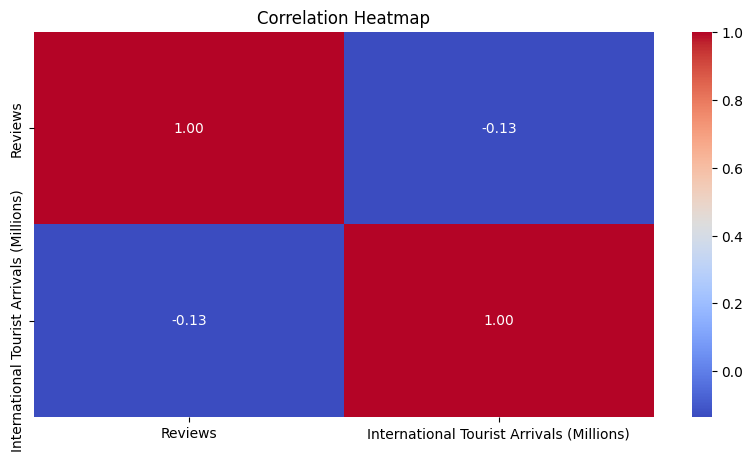

In [30]:
corr = reviews_without_city.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

## Result
<div style="padding: 25px; 
            background-color: #fdfdfd; 
            border: 1px solid #e1e4e8; 
            border-left: 5px solid #2c3e50;
            border-radius: 6px; 
            box-shadow: 0 2px 8px rgba(0,0,0,0.05); 
            font-family: -apple-system, BlinkMacSystemFont, 'Segoe UI', Helvetica, Arial, sans-serif;
            color: #24292e;
            max-width: 700px;
            margin: 10px 0;">
    <h2 style="margin-top: 0; font-size: 1.5em; font-weight: 600; color: #1a202c;">Correlation Analysis</h2>
    <p style="font-size: 1.1em; line-height: 1.5; margin-bottom: 15px;">
        The correlation between <span style="color: #0366d6; font-weight: 500;">Sum of Reviews</span> and 
        <span style="color: #0366d6; font-weight: 500;">Tourist Attraction</span> is 
        <span style="font-weight: 700; color: #d73a49; background: #ffeef0; padding: 2px 6px; border-radius: 3px;">-0.13</span>.
    </p>
    <p style="font-size: 0.95em; color: #586069; border-top: 1px solid #eaecef; padding-top: 15px;">
        <strong>Finding:</strong> The data indicate a negligible relationship, suggesting that review volume is not a significant predictor of attraction traffic.
    </p>
</div>
